In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the CSV file
df = pd.read_csv('Entities.csv')

In [3]:
# Display the first 5 rows of the dataset
df.head(5)

,location_id,property_type,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Total_Area,price
0,3325,Flat,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,02/04/2019,1089.004,10000000
1,3236,Flat,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,05/04/2019,15246.056,6900000
2,764,House,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,2178.008,16500000
3,340,House,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,04/05/2019,10890.000,43500000
4,3226,House,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,07/10/2019,2178.008,7000000


In [4]:
df.shape

(168446, 13)

In [5]:
# columns in the df
columns = df.columns
columns

Index(['location_id', 'property_type', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'purpose', 'bedrooms', 'date_added',
       'Total_Area', 'price'],
      dtype='object')

In [6]:
# drop columns
df.drop(['location_id', 'province_name', 'latitude','longitude', 'purpose', 'date_added' ], axis=1, inplace=True)

In [7]:
df.head()

,property_type,location,city,baths,bedrooms,Total_Area,price
0,Flat,G-10,Islamabad,2,2,1089.004,10000000
1,Flat,E-11,Islamabad,3,3,15246.056,6900000
2,House,G-15,Islamabad,6,5,2178.008,16500000
3,House,Bani Gala,Islamabad,4,4,10890.000,43500000
4,House,DHA Defence,Islamabad,3,3,2178.008,7000000


In [8]:
#goupby property_type
df.groupby('property_type')['property_type'].agg('count')

property_type
Farm House          657
Flat              38238
House            105468
Lower Portion      9229
Penthouse           395
Room                685
Upper Portion     13774
Name: property_type, dtype: int64

In [9]:
#groupby 'location,
df.groupby('city')['city'].agg('count')

city
Faisalabad     8133
Islamabad     37426
Karachi       60484
Lahore        41427
Rawalpindi    20976
Name: city, dtype: int64

In [10]:
#columns in the dataset
print(df.columns)

Index(['property_type', 'location', 'city', 'baths', 'bedrooms', 'Total_Area',
       'price'],
      dtype='object')


In [11]:
# check the null values in the df
df.isnull().sum()

property_type    0
location         0
city             0
baths            0
bedrooms         0
Total_Area       0
price            0
dtype: int64

In [12]:
# Check the number of rows with baths >= 10
baths_gte_10 = df[df['baths'] >= 10]
print(f"Number of rows with baths >= 10: {len(baths_gte_10)}")

Number of rows with baths >= 10: 877


In [13]:
# Drop the rows where baths >= 10
df = df[df['baths'] < 10]

# Verify that the rows have been dropped
print(f"Number of rows after dropping: {len(df)}")

Number of rows after dropping: 167569


In [14]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 167569 entries, 0 to 168445
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  167569 non-null  object 
 1   location       167569 non-null  object 
 2   city           167569 non-null  object 
 3   baths          167569 non-null  int64  
 4   bedrooms       167569 non-null  int64  
 5   Total_Area     167569 non-null  float64
 6   price          167569 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 10.2+ MB
None


In [15]:
# Check for instances where 'baths' is 0
baths_zero_count = (df['baths'] == 0).sum()

# Check for instances where 'bedrooms' is 0
bedrooms_zero_count = (df['bedrooms'] == 0).sum()
# Display the counts
print(f"Number of instances where 'baths' is 0: {baths_zero_count}")
print(f"Number of instances where 'bedrooms' is 0: {bedrooms_zero_count}")

Number of instances where 'baths' is 0: 42382
Number of instances where 'bedrooms' is 0: 22699


In [16]:
# Remove rows where 'bedrooms' and 'baths' are both 0
df = df[~((df['bedrooms'] == 0) & (df['baths'] == 0))]

# Optional: Reset the index after removal
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame shape
print(f"Updated DataFrame shape: {df.shape}")

Updated DataFrame shape: (145306, 7)


In [17]:
# Remove rows where 'bedrooms' is 0
df = df[df['bedrooms'] != 0]

# Optional: Reset the index after removal
df.reset_index(drop=True, inplace=True)


In [18]:
# Display the updated DataFrame shape
print(f"Updated DataFrame shape: {df.shape}")

Updated DataFrame shape: (144870, 7)


In [19]:
# Remove rows where 'Total_Area' is 0
df = df[df['Total_Area'] != 0]

# Optional: Reset the index after removal
df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame shape
print(f"Updated DataFrame shape: {df.shape}")

Updated DataFrame shape: (144860, 7)


In [20]:
# Filter rows where 'baths' is 0
zero_baths = df[df['baths'] == 0]

# Display the filtered rows
print(zero_baths)

# Optional: Display the count of such rows
print(f"Number of rows with 'baths' = 0: {len(zero_baths)}")

       property_type        location     city  baths  bedrooms  Total_Area  \
45             House            Eden   Lahore      0         3    2450.259   
50             House     EME Society   Lahore      0         5    5445.000   
51             House     EME Society   Lahore      0         6    5445.000   
52             House      Izmir Town   Lahore      0         6   87120.000   
55             House  Cavalry Ground   Lahore      0         4    2722.510   
...              ...             ...      ...    ...       ...         ...   
144854          Flat      Gadap Town  Karachi      0         2   10345.538   
144855         House      Gadap Town  Karachi      0         6   26136.096   
144856         House      Gadap Town  Karachi      0         3    2178.008   
144857         House      Gadap Town  Karachi      0         6   26136.096   
144858         House      Gadap Town  Karachi      0         3   21235.578   

           price  
45       9500000  
50      32500000  
51    

In [21]:
# Remove rows where 'baths' is 0
df = df[df['baths'] != 0]

# Optional: Reset the index after removal
df.reset_index(drop=True, inplace=True)

In [22]:
df.shape

(124741, 7)

In [23]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['baths', 'bedrooms', 'Total_Area', 'price'], dtype='object')


In [24]:
# categorical columns in the dataset
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['property_type', 'location', 'city'], dtype='object')


In [25]:
# Check for exact duplicate rows across all columns
duplicates = df.duplicated()

# Display the exact duplicate rows
duplicate_rows = df[duplicates]

# Show the duplicate rows
print(duplicate_rows)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

        property_type             location        city  baths  bedrooms  \
62              House               Askari      Lahore      5         4   
66              House               Askari      Lahore      5         4   
166             House                Malir     Karachi      5         4   
233     Upper Portion                 F-11   Islamabad      3         3   
237             House            Askari 13  Rawalpindi      4         3   
...               ...                  ...         ...    ...       ...   
124736          House  Bahria Town Karachi     Karachi      4         3   
124737          House  Bahria Town Karachi     Karachi      4         3   
124738          House  Bahria Town Karachi     Karachi      3         3   
124739          House  Bahria Town Karachi     Karachi      4         4   
124740          House  Bahria Town Karachi     Karachi      3         3   

        Total_Area     price  
62        2722.510  21500000  
66        2722.510  23000000  
166   

In [26]:
# Define the function to check if a value can be converted to float
def is_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# Apply the function and filter rows where 'Total_Area' is not a float
non_float_rows = df[~df['Total_Area'].apply(is_float)]

# Display the rows
print(non_float_rows.head())

Empty DataFrame
Columns: [property_type, location, city, baths, bedrooms, Total_Area, price]
Index: []


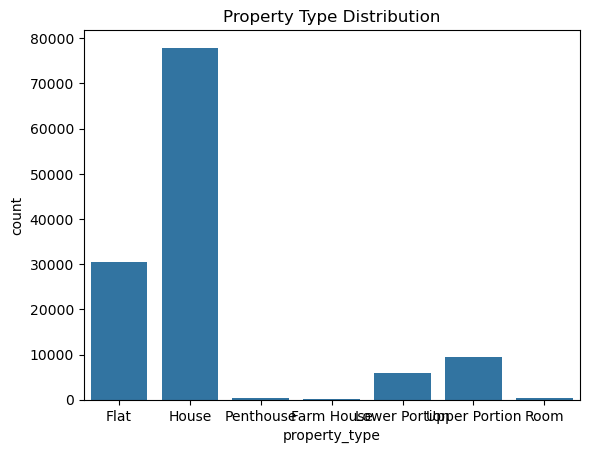

In [27]:
# Plot the distribution of a categorical column
sns.countplot(data=df, x='property_type')
plt.title("Property Type Distribution")
plt.show()

In [28]:
df = df[df['Total_Area'] <= df['Total_Area'].quantile(0.99)]

In [29]:
df.shape

(123663, 7)

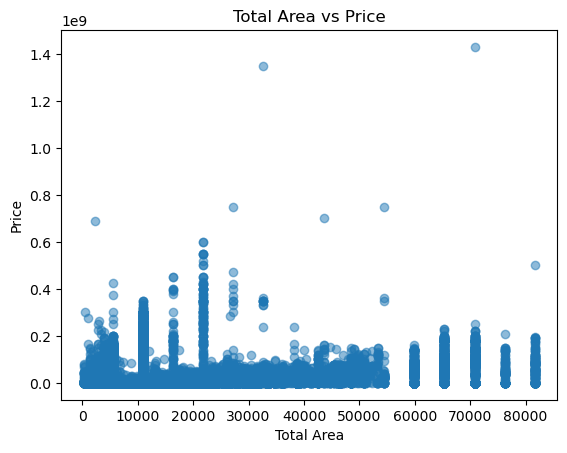

In [30]:
# Scatter plot between Total_Area and price
plt.scatter(df['Total_Area'], df['price'], alpha=0.5)
plt.xlabel("Total Area")
plt.ylabel("Price")
plt.title("Total Area vs Price")
plt.show()

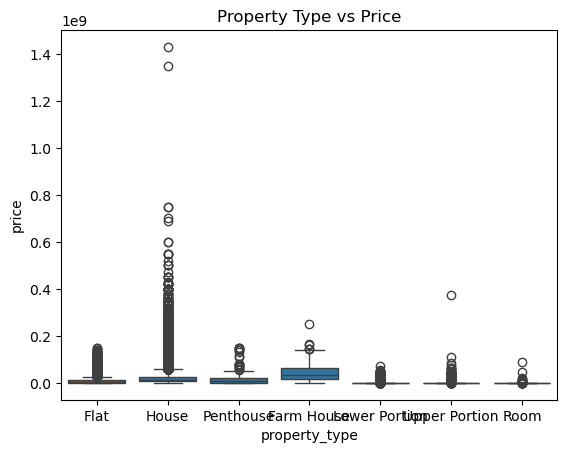

In [31]:
# Box plot for property type vs price
sns.boxplot(data=df, x='property_type', y='price')
plt.title("Property Type vs Price")
plt.show()

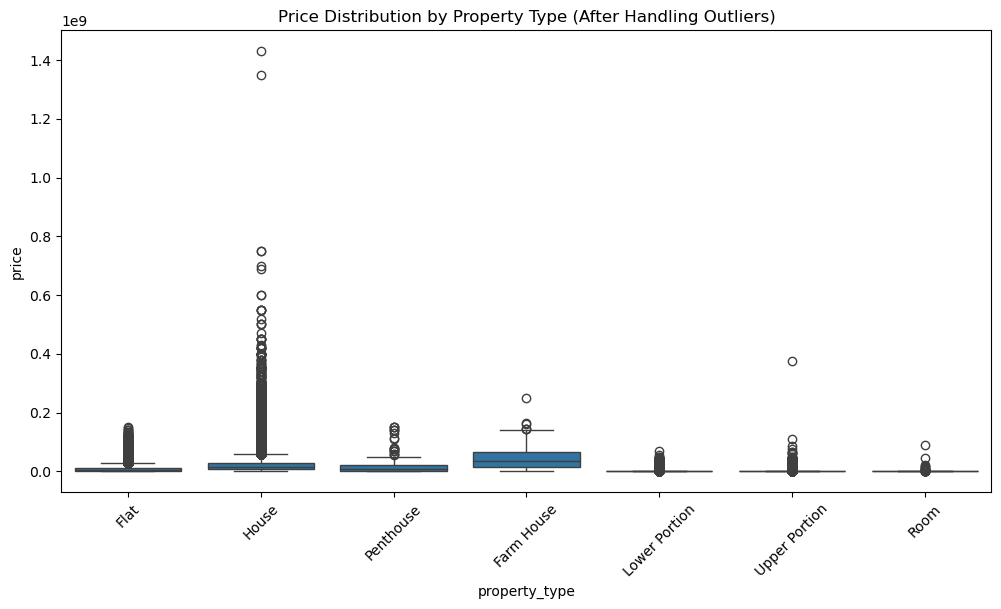

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='property_type', y='price')
plt.title('Price Distribution by Property Type (After Handling Outliers)')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Identify rows where 'Total_Area' is not of type int or float
non_numeric_total_area = df[~df['Total_Area'].apply(lambda x: isinstance(x, (int, float)))]

# Display these rows
print(non_numeric_total_area)

Empty DataFrame
Columns: [property_type, location, city, baths, bedrooms, Total_Area, price]
Index: []


In [34]:
# Check the summary statistics
print(df['price'].describe())

count    1.236630e+05
mean     1.717478e+07
std      2.915611e+07
min      1.000000e+00
25%      3.100000e+05
50%      9.000000e+06
75%      2.000000e+07
max      1.430000e+09
Name: price, dtype: float64


In [35]:
# Display rows with low prices
low_price_threshold = df['price'].quantile(0.3)  # Bottom 1% threshold
low_price_rows = df[df['price'] <= low_price_threshold]
print(low_price_rows)

        property_type                location        city  baths  bedrooms  \
32              House             DHA Defence   Islamabad      5         5   
33              House                     F-7   Islamabad      6         6   
34      Lower Portion                    G-15   Islamabad      2         2   
35              House           Pakistan Town   Islamabad      5         3   
36      Upper Portion              Bhara kahu   Islamabad      2         2   
...               ...                     ...         ...    ...       ...   
124662  Lower Portion      PWD Housing Scheme   Islamabad      3         3   
124663          House                     F-7   Islamabad      6         5   
124698           Flat  Bahria Town Rawalpindi  Rawalpindi      1         1   
124704           Flat  Bahria Town Rawalpindi  Rawalpindi      1         1   
124705  Upper Portion           Chak 208 Road  Faisalabad      2         2   

        Total_Area    price  
32        5445.000   110000  
33 

In [36]:
# Remove rows with 'price' below the threshold
df = df[df['price'] > low_price_threshold]

In [37]:
df.shape

(86561, 7)

In [38]:
# Create a new feature for price per unit area
df['price_per_area'] = df['price'] / df['Total_Area']

# Check summary statistics
print(df['price_per_area'].describe())

count     86561.000000
mean       6158.188346
std        6271.590930
min          42.852770
25%        1068.536606
50%        6198.324340
75%        8723.567590
max      550962.163592
Name: price_per_area, dtype: float64


In [39]:
df.head()

,property_type,location,city,baths,bedrooms,Total_Area,price,price_per_area
0,Flat,G-10,Islamabad,2,2,1089.004,10000000,9182.702727
1,Flat,E-11,Islamabad,3,3,15246.056,6900000,452.576063
2,House,G-15,Islamabad,6,5,2178.008,16500000,7575.729749
3,House,Bani Gala,Islamabad,4,4,10890.000,43500000,3994.490358
4,House,DHA Defence,Islamabad,3,3,2178.008,7000000,3213.945954


In [40]:
# Filter rows where number of baths is greater than number of bedrooms
baths_greater_than_bedrooms = df[df['baths'] > df['bedrooms']]

# Display the rows
print(baths_greater_than_bedrooms)

# Check the count of such rows
print(f"Number of rows where baths > bedrooms: {len(baths_greater_than_bedrooms)}")

       property_type             location       city  baths  bedrooms  \
2              House                 G-15  Islamabad      6         5   
12              Flat          DHA Defence  Islamabad      5         3   
18             House                 G-11  Islamabad      7         6   
29             House          Ghauri Town  Islamabad      3         2   
47             House              Gulberg     Lahore      6         5   
...              ...                  ...        ...    ...       ...   
124731         House  Bahria Town Karachi    Karachi      4         3   
124732         House  Bahria Town Karachi    Karachi      4         3   
124733         House  Bahria Town Karachi    Karachi      5         4   
124736         House  Bahria Town Karachi    Karachi      4         3   
124737         House  Bahria Town Karachi    Karachi      4         3   

        Total_Area     price  price_per_area  
2         2178.008  16500000     7575.729749  
12        2722.510  13500000 

In [41]:
# Update the 'baths' column to match the 'bedrooms' column where baths > bedrooms
df.loc[df['baths'] > df['bedrooms'], 'baths'] = df.loc[df['baths'] > df['bedrooms'], 'bedrooms']

# Verify the update
baths_greater_than_bedrooms_after = df[df['baths'] > df['bedrooms']]
print(f"Number of rows where baths > bedrooms after equalizing: {len(baths_greater_than_bedrooms_after)}")

Number of rows where baths > bedrooms after equalizing: 0


Statistics for price_per_area:
count     86561.000000
mean       6158.188346
std        6271.590930
min          42.852770
25%        1068.536606
50%        6198.324340
75%        8723.567590
max      550962.163592
Name: price_per_area, dtype: float64


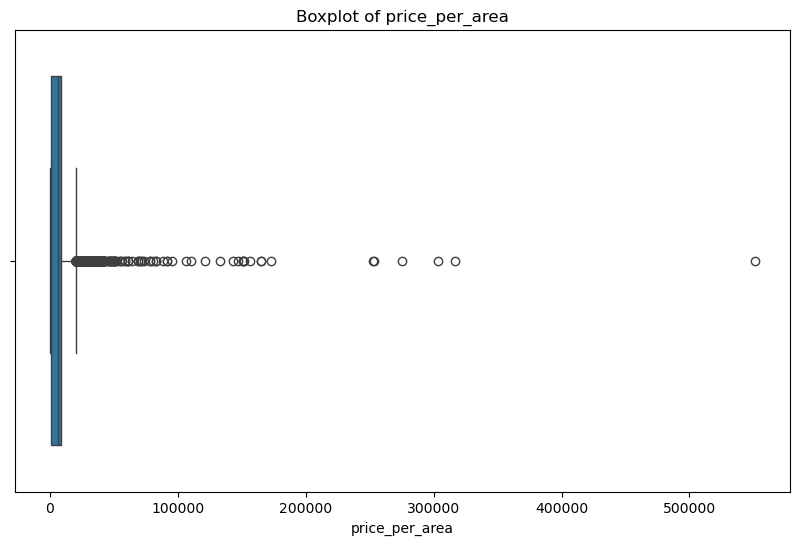

Lower bound: 0, Upper bound: 20206.114066914193
Number of rows removed: 1640
Cleaned data statistics:
count    84921.000000
mean      5703.967438
std       4331.033507
min         42.852770
25%       1034.670730
50%       6060.583800
75%       8539.944904
max      20202.020202
Name: price_per_area, dtype: float64


In [42]:
# Compute price_per_area
df['price_per_area'] = df['price'] / df['Total_Area']

# Summary statistics
print("Statistics for price_per_area:")
print(df['price_per_area'].describe())

# Visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_area'])
plt.title('Boxplot of price_per_area')
plt.show()

# Set thresholds (use IQR method or domain knowledge)
Q1 = df['price_per_area'].quantile(0.25)
Q3 = df['price_per_area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(Q1 - 1.5 * IQR, 0)  # Price per area should not be negative
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Filter outliers
df_cleaned = df[(df['price_per_area'] >= lower_bound) & (df['price_per_area'] <= upper_bound)]

# Number of rows removed
rows_removed = len(df) - len(df_cleaned)
print(f"Number of rows removed: {rows_removed}")

# Replace original DataFrame with cleaned version
df = df_cleaned

# Verify the cleaned data
print("Cleaned data statistics:")
print(df['price_per_area'].describe())

In [43]:
df.shape

(84921, 8)

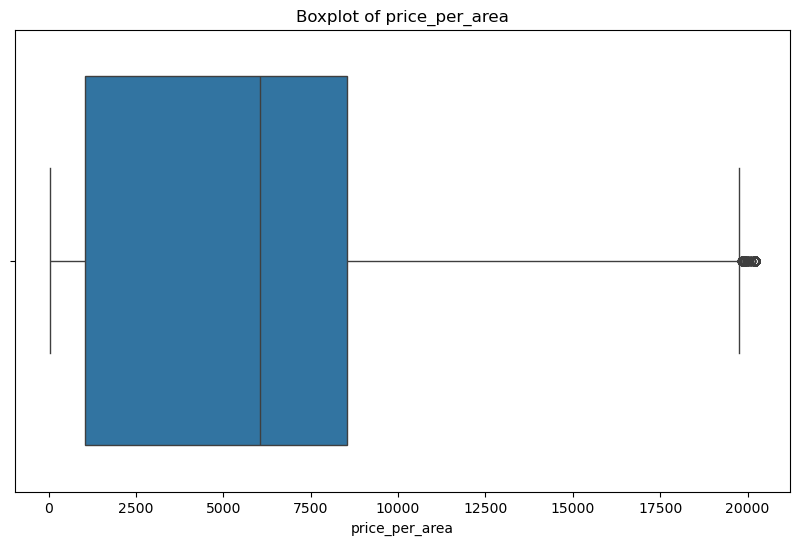

In [44]:
# Plot the distribution of 'price_per_area'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_area'])
plt.title('Boxplot of price_per_area')
plt.show()


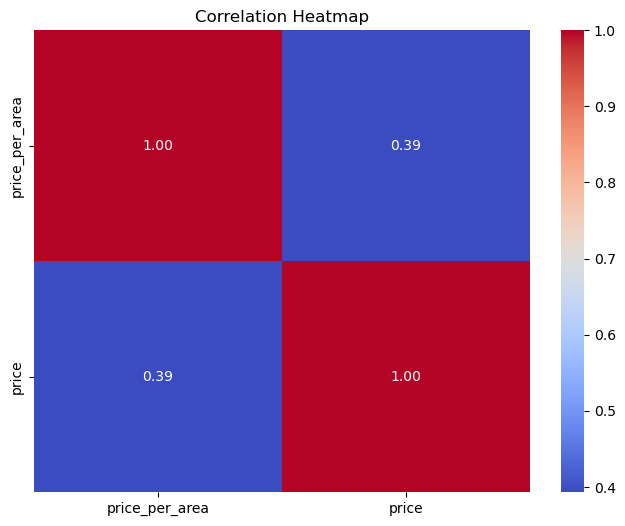

In [45]:
# Select relevant columns for correlation
correlation_data = df[['price_per_area', 'price']]
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [46]:
df.head()

,property_type,location,city,baths,bedrooms,Total_Area,price,price_per_area
0,Flat,G-10,Islamabad,2,2,1089.004,10000000,9182.702727
1,Flat,E-11,Islamabad,3,3,15246.056,6900000,452.576063
2,House,G-15,Islamabad,5,5,2178.008,16500000,7575.729749
3,House,Bani Gala,Islamabad,4,4,10890.000,43500000,3994.490358
4,House,DHA Defence,Islamabad,3,3,2178.008,7000000,3213.945954


In [47]:
df.shape

(84921, 8)

In [48]:
df.location = df.location.apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
DHA Defence               11662
Bahria Town Karachi        6977
Bahria Town                5101
Gulistan-e-Jauhar          3303
Bahria Town Rawalpindi     3018
                          ...  
Dhoke Dalal Road              1
Dhok Naju                     1
Partal Town                   1
Kamal Abad                    1
12th Avenue                   1
Name: location, Length: 1346, dtype: int64

In [49]:
# len of location which have less than 1 datapoint
len(location_stats[location_stats <=10])

885

In [50]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
Shahrah-e-Pakistan    10
Pir Wadhai            10
Jhang Syedan          10
Committee Chowk       10
Simly Dam Road        10
                      ..
Dhoke Dalal Road       1
Dhok Naju              1
Partal Town            1
Kamal Abad             1
12th Avenue            1
Name: location, Length: 885, dtype: int64

In [51]:
df.location = df.location.apply(lambda x : 'others' if x in location_less_than_10 else x)

df.tail(10)

,property_type,location,city,baths,bedrooms,Total_Area,price,price_per_area
124731,House,Bahria Town Karachi,Karachi,3,3,1633.506,14000000,8570.522545
124732,House,Bahria Town Karachi,Karachi,3,3,16607.311,9500000,572.037219
124733,House,Bahria Town Karachi,Karachi,4,4,3811.514,14000000,3673.081091
124734,Flat,Bahria Town Karachi,Karachi,2,2,11434.542,5200000,454.762421
124735,Flat,Bahria Town Karachi,Karachi,3,3,2178.008,7500000,3443.513522
124736,House,Bahria Town Karachi,Karachi,3,3,2178.008,8800000,4040.389200
124737,House,Bahria Town Karachi,Karachi,3,3,1361.255,5000000,3673.081091
124738,House,Bahria Town Karachi,Karachi,3,3,2178.008,14000000,6427.891909
124739,House,Bahria Town Karachi,Karachi,4,4,3811.514,14000000,3673.081091
124740,House,Bahria Town Karachi,Karachi,3,3,25591.594,9000000,351.677977


In [52]:
df[df.Total_Area/df.bedrooms <300].head()

,property_type,location,city,baths,bedrooms,Total_Area,price,price_per_area
23,House,others,Islamabad,4,4,1089.004,6800000,6244.237854
102,House,Chakri Road,Rawalpindi,5,6,1361.255,5000000,3673.081091
261,House,Allama Iqbal Town,Lahore,2,3,544.502,6000000,11019.243272
262,House,Allama Iqbal Town,Lahore,2,3,544.502,5500000,10100.972999
332,House,G-13,Islamabad,5,5,1089.004,14000000,12855.783817


In [53]:
# remove all these [df.Total_Area/df.bedrooms <300] from my df
df = df[~(df.Total_Area/df.bedrooms <300)]
df.shape

(78673, 8)

In [54]:
df.price_per_area.describe()

count    78673.000000
mean      5473.880865
std       4345.285131
min         42.852770
25%        940.667109
50%       5713.681697
75%       8402.203857
max      20202.020202
Name: price_per_area, dtype: float64

In [55]:
df.shape

(78673, 8)

In [56]:
# Define a function to remove outliers based on mean and standard deviation
def remove_outliers(group):
    mean = group['price_per_area'].mean()
    std = group['price_per_area'].std()
    lower_bound = mean - 3 * std  # Define lower bound
    upper_bound = mean + 3 * std  # Define upper bound
    return group[(group['price_per_area'] >= lower_bound) & (group['price_per_area'] <= upper_bound)]

# Apply the function to each group by 'location'
df = df.groupby('location', group_keys=False).apply(remove_outliers)

# Display the number of rows removed
rows_removed = len(df) - len(df)
print(f"Number of rows removed: {rows_removed}")

# Check the statistics of the cleaned data
print(df['price_per_area'].describe())

Number of rows removed: 0
count    77880.000000
mean      5433.814173
std       4296.344476
min         42.852770
25%        944.016168
50%       5693.275690
75%       8264.462810
max      20202.020202
Name: price_per_area, dtype: float64


C:\Users\govth\AppData\Local\Temp\ipykernel_8764\1892347041.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('location', group_keys=False).apply(remove_outliers)


In [57]:
df.shape

(77880, 8)

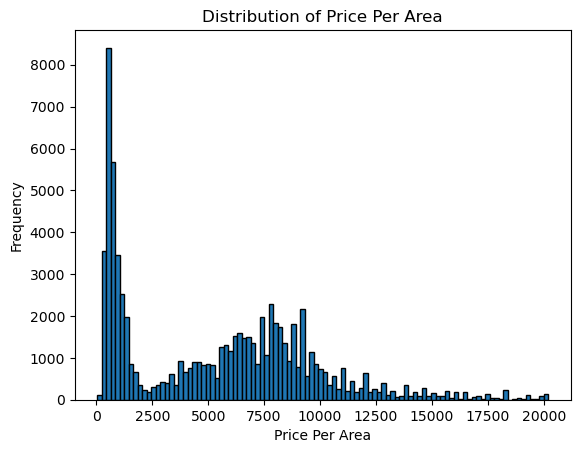

In [58]:
import matplotlib.pyplot as plt

plt.hist(df['price_per_area'], bins=100, edgecolor='k')
plt.title('Distribution of Price Per Area')
plt.xlabel('Price Per Area')
plt.ylabel('Frequency')
plt.show()

Number of rows with price_per_area < 1000: 20443
Statistics for rows with low price_per_area:
count    20443.000000
mean       618.842215
std        179.309428
min         42.852770
25%        487.547586
50%        602.614866
75%        746.094597
max        999.294120
Name: price_per_area, dtype: float64
Grouped by location (top 10 locations with low price_per_area):
                      count        mean      median
location                                           
Gulistan-e-Jauhar      2140  601.296447  603.043164
Bahria Town Karachi    2114  581.085981  559.707595
DHA Defence            1335  695.244002  742.431284
Gulshan-e-Iqbal Town   1316  640.014266  631.310812
Scheme 33              1120  620.604862  554.427334
Gadap Town             1055  561.978967  545.222974
North Nazimabad         821  628.521001  612.180182
North Karachi           781  611.146634  524.725870
others                  670  593.940163  578.579315
Federal B Area          549  612.295838  612.180182


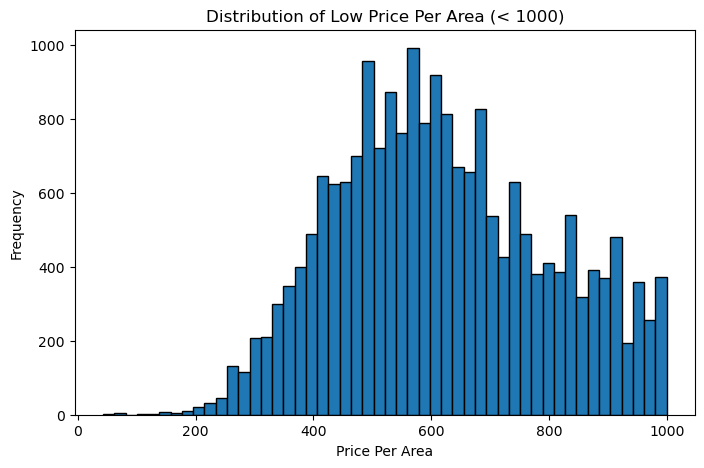

In [59]:
# Set the threshold for low values
low_value_threshold = 1000

# Filter rows with price_per_area below the threshold
low_values = df[df['price_per_area'] < low_value_threshold]

# Display the number of such rows and their statistics
print(f"Number of rows with price_per_area < {low_value_threshold}: {len(low_values)}")
print("Statistics for rows with low price_per_area:")
print(low_values['price_per_area'].describe())

# Investigate further by grouping by 'location' and checking the mean/median for low values
location_analysis = low_values.groupby('location')['price_per_area'].agg(['count', 'mean', 'median']).sort_values('count', ascending=False)
print("Grouped by location (top 10 locations with low price_per_area):")
print(location_analysis.head(10))

# Histogram of low values
plt.figure(figsize=(8, 5))
plt.hist(low_values['price_per_area'], bins=50, edgecolor='k')
plt.title("Distribution of Low Price Per Area (< 1000)")
plt.xlabel("Price Per Area")
plt.ylabel("Frequency")
plt.show()


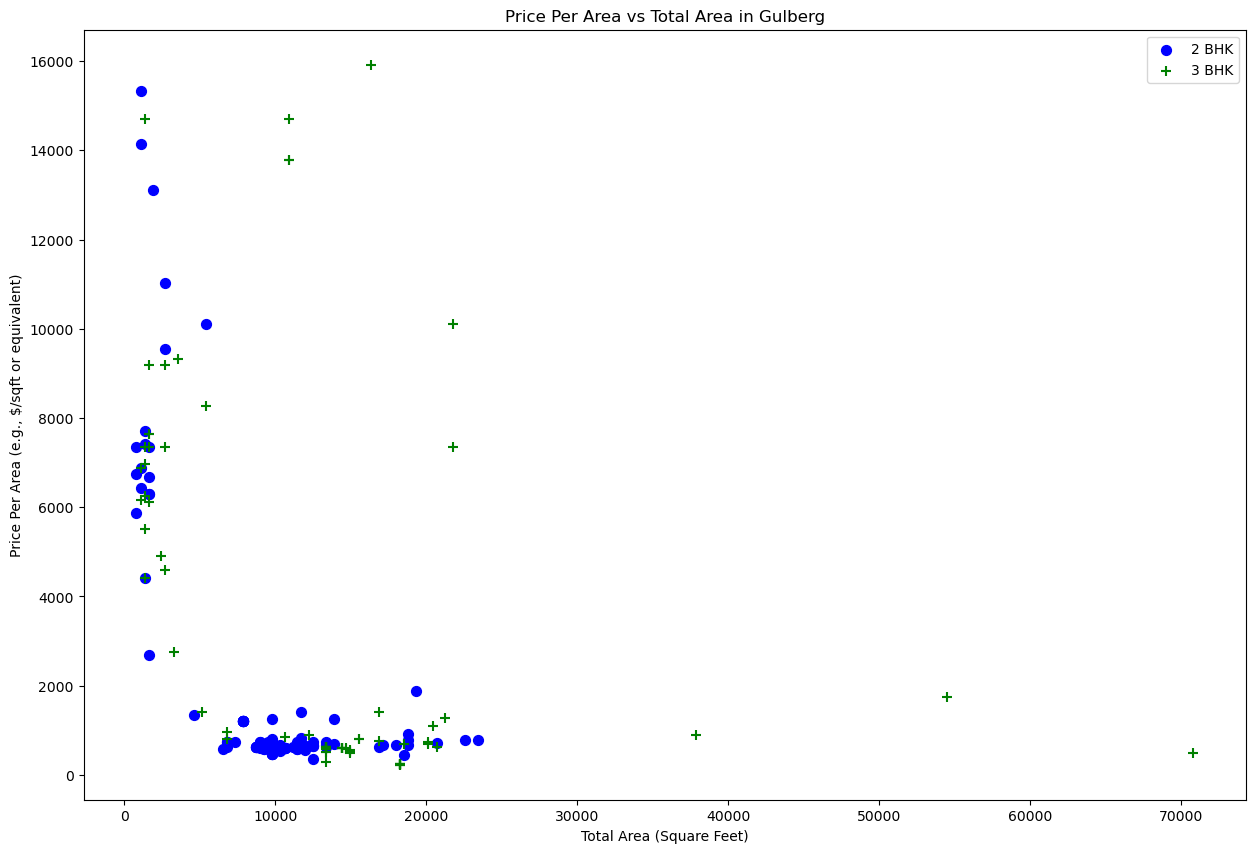

In [60]:
 #Function to plot scatter chart for price_per_area
def plot_scatter_chart(df, location):
    # Filter data for the given location and BHK types
    bhk2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    
    # Ensure sufficient data for meaningful plots
    if bhk2.empty or bhk3.empty:
        print(f"Not enough data for 2 BHK or 3 BHK in {location}")
        return
    
    # Set plot size
    plt.rcParams['figure.figsize'] = (15, 10)
    
    # Scatter plots for 2 BHK and 3 BHK
    plt.scatter(bhk2['Total_Area'], bhk2['price_per_area'], 
                color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['Total_Area'], bhk3['price_per_area'], 
                marker='+', color='green', label='3 BHK', s=50)
    
    # Add labels, title, and legend
    plt.xlabel("Total Area (Square Feet)")
    plt.ylabel("Price Per Area (e.g., $/sqft or equivalent)")
    plt.title(f"Price Per Area vs Total Area in {location}")
    plt.legend()
    plt.show()

# Example usage:
plot_scatter_chart(df, 'Gulberg')

Text(0, 0.5, 'Count')

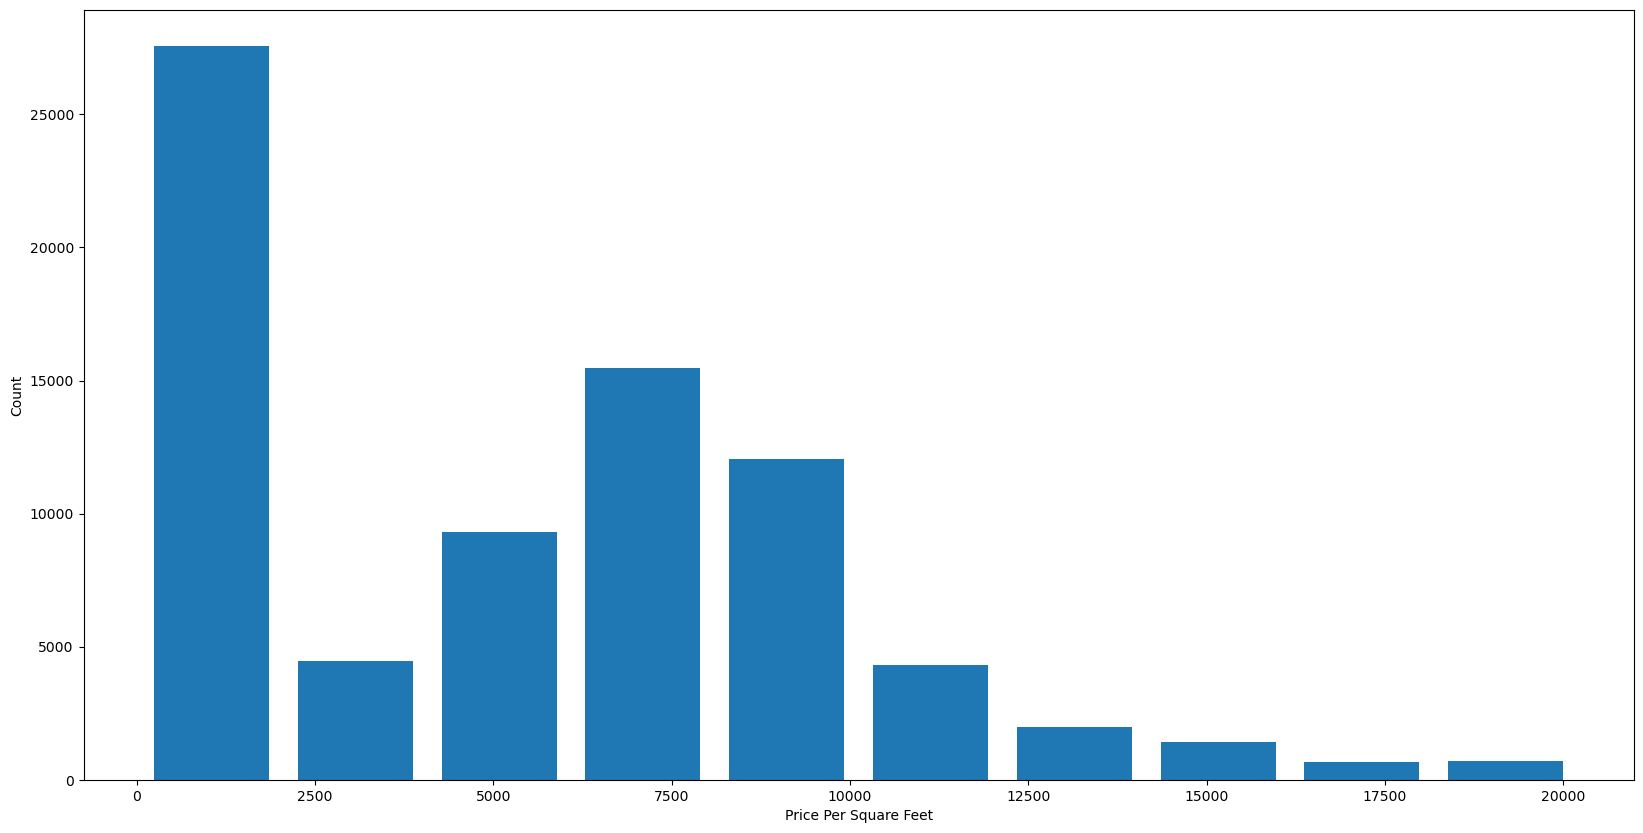

In [61]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(df.price_per_area,rwidth=0.8,) 
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

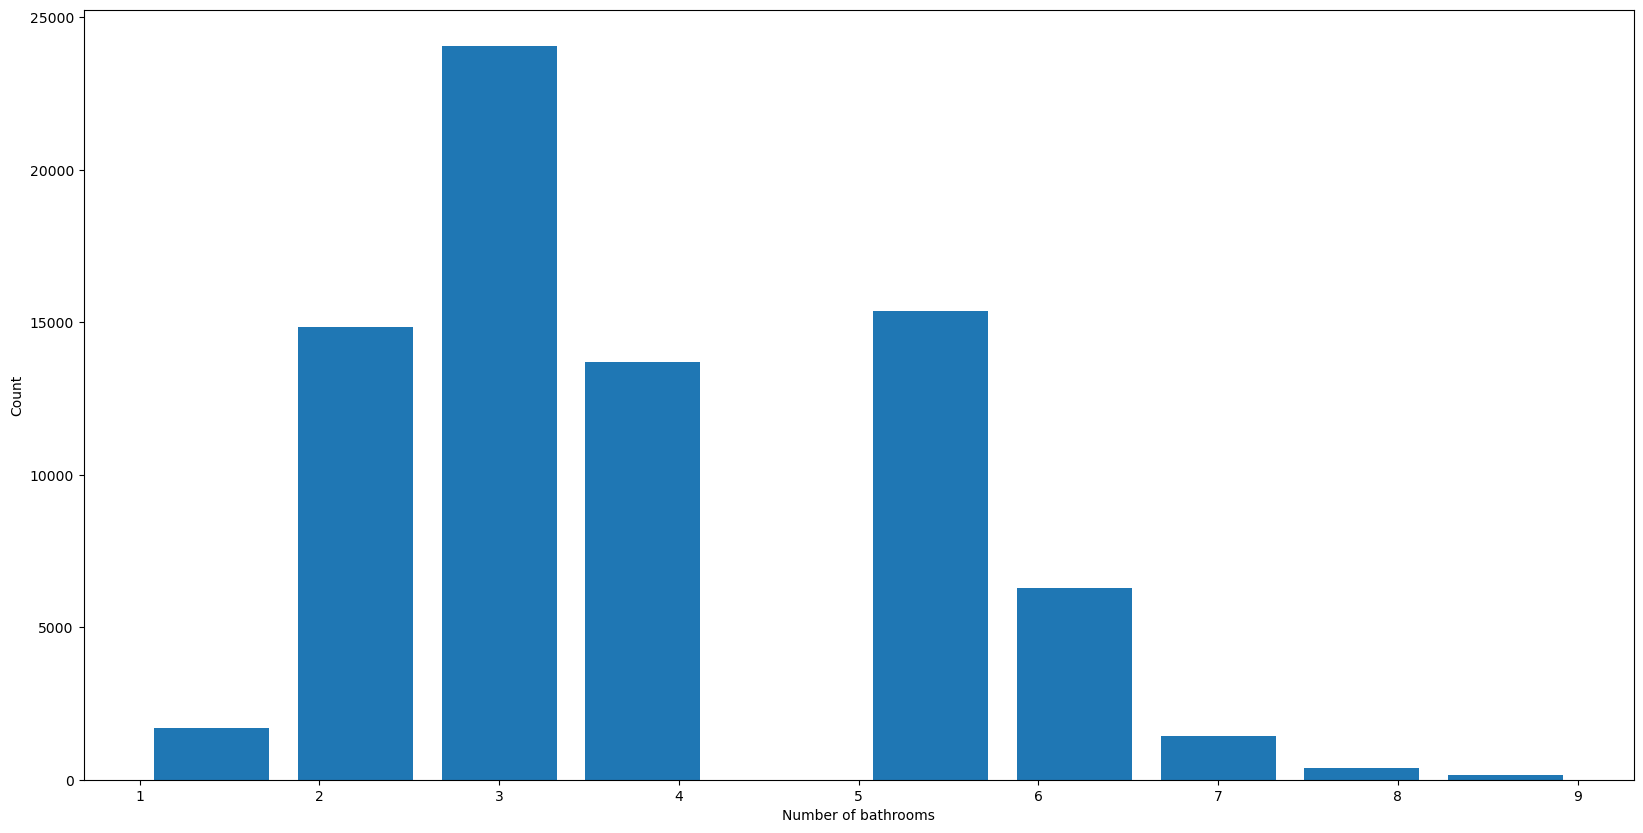

In [62]:
plt.hist(df.baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [63]:
df.head()

,property_type,location,city,baths,bedrooms,Total_Area,price,price_per_area
1448,House,AWT Army Welfare Trust,Lahore,4,4,2722.51,11000000,4040.389200
42569,House,AWT Army Welfare Trust,Lahore,3,3,5445.00,19000000,3489.439853
44180,House,AWT Army Welfare Trust,Lahore,4,4,2722.51,15000000,5509.621636
44639,House,AWT Army Welfare Trust,Lahore,5,5,2722.51,14800000,5436.160014
63010,House,AWT Army Welfare Trust,Lahore,3,3,2722.51,15000000,5509.621636


In [64]:
df = df.drop(['location','price_per_area'],axis='columns')
df.head(3)

,property_type,city,baths,bedrooms,Total_Area,price
1448,House,Lahore,4,4,2722.51,11000000
42569,House,Lahore,3,3,5445.00,19000000
44180,House,Lahore,4,4,2722.51,15000000


In [75]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data into features (X) and target (y)
X = df.drop(columns=['price'])  # Replace 'price' with your target column
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numeric columns
categorical_columns = ['property_type', 'city']
numeric_columns = ['Total_Area']

In [76]:
# Initialize encoders and scalers
ohe = OneHotEncoder()
scaler = MinMaxScaler()

# One-Hot Encode categorical columns
ohe.fit(X_train[categorical_columns])  # Fit on training categorical columns
X_train_encoded = ohe.transform(X_train[categorical_columns])  # Transform training data
X_test_encoded = ohe.transform(X_test[categorical_columns])    # Transform test data

In [77]:
# Normalize numeric columns
scaler.fit(X_train[numeric_columns])  # Fit scaler on training numeric columns
X_train_scaled = scaler.transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Combine encoded categorical and scaled numeric columns
import numpy as np
X_train_preprocessed = np.hstack((X_train_encoded.toarray(), X_train_scaled))
X_test_preprocessed = np.hstack((X_test_encoded.toarray(), X_test_scaled))

In [78]:
# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_preprocessed, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 598578440807758.6
R-squared Score: 0.2144695943069187


In [79]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define metric for evaluation (Mean Squared Error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation for each model
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
    results[model_name] = {
        'Mean MSE': -np.mean(scores),
        'Standard Deviation': np.std(scores)
    }

# Display Results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean MSE: {metrics['Mean MSE']:.2f}")
    print(f"  Standard Deviation: {metrics['Standard Deviation']:.2f}\n")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_base.py", line 609, in fit
    X, y = self._validate_data(
           ~~~~~~~~~~~~~~~~~~~^
        X,
        ^^
    ...<4 lines>...
        force_writeable=True,
        ^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\govth\miniconda3\envs\ml_env\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'House'
